In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Read the data: Note, change filepath input based on the dataset location on your computer
data = pd.read_csv('/Users/tanmayarodda/Desktop/Group 1 - AIT 736 DL1/true_car_listings.csv')
data.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [6]:
# Summary statistics of numerical features
print(data.describe())

               Price           Year       Mileage
count  852122.000000  852122.000000  8.521220e+05
mean    21464.100210    2013.289145  5.250779e+04
std     13596.202241       3.414987  4.198896e+04
min      1500.000000    1997.000000  5.000000e+00
25%     13000.000000    2012.000000  2.383600e+04
50%     18500.000000    2014.000000  4.025600e+04
75%     26995.000000    2016.000000  7.218600e+04
max    499500.000000    2018.000000  2.856196e+06


In [7]:
# Check for null values
print(data.isnull().sum())

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64


In [8]:
# Preprocess the data
numeric_cols = ['Year', 'Mileage']
categorical_cols = ['Make', 'Model','City','State']

In [ ]:
# # Identify outliers using IQR method 
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
#     return df[~outliers]

# # Apply outlier removal to numeric columns
# for col in numeric_cols:
#     data = remove_outliers_iqr(data, col)

In [9]:
# Drop columns that doesn't affect the prediction
data = data.drop(['Vin'], axis=1)

In [10]:
# Target encode categorical features
target_encoder = TargetEncoder()
data[categorical_cols] = target_encoder.fit_transform(data[categorical_cols], data['Price'])

In [11]:
# Separate features and target
X = data[numeric_cols + categorical_cols]
y = data['Price']

In [12]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Define feature combinations
feature_combinations = [
['Year'],
['Mileage'],
['City'],
['State'],
['Make'],
['Model'],
['Year', 'Mileage'],
['Year', 'City'],
['Year', 'State'],
['Year', 'Make'],
['Year', 'Model'],
['Mileage', 'City'],
['Mileage', 'State'],
['Mileage', 'Make'],
['Mileage', 'Model'],
['City', 'State'],
['City', 'Make'],
['City', 'Model'],
['State', 'Make'],
['State', 'Model'],
['Make', 'Model'],
['Year', 'Mileage', 'City'],
['Year', 'Mileage', 'State'],
['Year', 'Mileage', 'Make'],
['Year', 'Mileage', 'Model'],
['Year', 'City', 'State'],
['Year', 'City', 'Make'],
['Year', 'City', 'Model'],
['Year', 'State', 'Make'],
['Year', 'State', 'Model'],
['Year', 'Make', 'Model'],
['Mileage', 'City', 'State'],
['Mileage', 'City', 'Make'],
['Mileage', 'City', 'Model'],
['Mileage', 'State', 'Make'],
['Mileage', 'State', 'Model'],
['Mileage', 'Make', 'Model'],
['City', 'State', 'Make'],
['City', 'State', 'Model'],
['City', 'Make', 'Model'],
['State', 'Make', 'Model'],
['Year', 'Mileage', 'City', 'State'],
['Year', 'Mileage', 'City', 'Make'],
['Year', 'Mileage', 'City', 'Model'],
['Year', 'Mileage', 'State', 'Make'],
['Year', 'Mileage', 'State', 'Model'],
['Year', 'Mileage', 'Make', 'Model'],
]

In [14]:
# Perform cross-validation
best_score = 0
best_features = None
for features in feature_combinations:
    X_subset = X_scaled[:, [X.columns.get_loc(col) for col in features]]
    model = LinearRegression()
    scores = cross_val_score(model, X_subset, y, cv=5, scoring='r2')
    avg_score = scores.mean()
    if avg_score > best_score:
        best_score = avg_score
        best_features = features
    print(f'Features: {features}, Average R-squared: {avg_score:.4f}')

print(f'Best feature combination: {best_features}, Average R-squared: {best_score:.4f}')

Features: ['Year'], Average R-squared: 0.1650
Features: ['Mileage'], Average R-squared: 0.1773
Features: ['City'], Average R-squared: 0.1025
Features: ['State'], Average R-squared: 0.0070
Features: ['Make'], Average R-squared: 0.3056
Features: ['Model'], Average R-squared: 0.6522
Features: ['Year', 'Mileage'], Average R-squared: 0.1937
Features: ['Year', 'City'], Average R-squared: 0.2315
Features: ['Year', 'State'], Average R-squared: 0.1696
Features: ['Year', 'Make'], Average R-squared: 0.4808
Features: ['Year', 'Model'], Average R-squared: 0.7071
Features: ['Mileage', 'City'], Average R-squared: 0.2413
Features: ['Mileage', 'State'], Average R-squared: 0.1838
Features: ['Mileage', 'Make'], Average R-squared: 0.4634
Features: ['Mileage', 'Model'], Average R-squared: 0.7231
Features: ['City', 'State'], Average R-squared: 0.1023
Features: ['City', 'Make'], Average R-squared: 0.3455
Features: ['City', 'Model'], Average R-squared: 0.6639
Features: ['State', 'Make'], Average R-squared: 0.

In [15]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
# Fit the linear regression model to the training data using the best feature combination
best_subset_indices = [X.columns.get_loc(col) for col in best_features]
X_train_subset = X_train[:, best_subset_indices]
X_test_subset = X_test[:, best_subset_indices]
model = LinearRegression()
model.fit(X_train_subset, y_train)

LinearRegression()

In [17]:
# Make predictions
y_pred = model.predict(X_test_subset)

In [18]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 46205175.64957745
R-squared: 0.7486888416784756


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


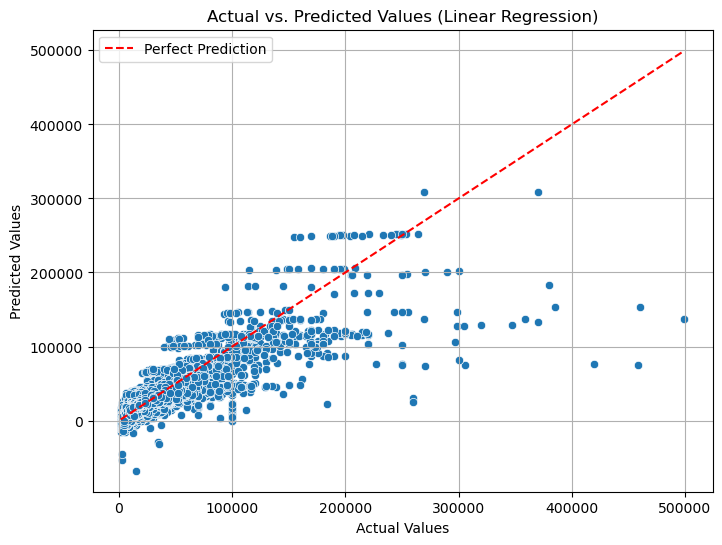

In [19]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.grid(True)

# Plot the regression line
sns.lineplot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()

plt.show()